Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
from sklearn import metrics
plt.rcParams['figure.figsize'] = (15, 6)

Using Theano backend.


# Load the Data

In [2]:
X_train = np.load('./wine/X_train.npy')
y_train = np.load('./wine/y_train.npy')
X_test = np.load('./wine/X_test.npy')
y_test = np.load('./wine/y_test.npy')
X_deploy = np.load('./wine/X_deploy.npy')
y_deploy = np.load('./wine/y_deploy.npy')

print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 113
Number of validation examples 29
Number of testing examples 36


# Initialize the classifiers as the training time


In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh.fit(X_train, y_train)
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
clf_svm_linear.fit(X_train, y_train)
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
clf_svm.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
clf_dt.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf_dt_IG.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGKN.fit(X_train, y_train)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
clf_dt_BGDT.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
clf_dt_AD.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
clf_dt_LDA.fit(X_train, y_train)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
clf_dt_QDA.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=1e5)
LogReg.fit(X_train, y_train)

from sklearn.gaussian_process import GaussianProcessClassifier
GP = GaussianProcessClassifier()
GP.fit(X_train, y_train)

import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train, eval_metric="multi_logloss")

import xgboost as xgb
XG_Boost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)


In [4]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test) 
labelsDepy = np_utils.to_categorical(y_deploy)                                                                                         
model = Sequential()
model.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))
model.load_weights('/Users/salemameen/Desktop/banditsbook/python_wine/wineModelbest.hdf5')
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# UCB1

In [5]:
# MAB_NN(4%REMOVED) MODEL1    1               
model1 = Sequential()
model1.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model1.add(Dense(4, activation="softmax"))
model1.load_weights('./UCB1/spam0.hdf5')
model1.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [6]:
# MAB_NN(36%REMOVED) MODEL2 9
model2 = Sequential()
model2.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model2.add(Dense(4, activation="softmax"))
model2.load_weights('./UCB1/spam8.hdf5')
model2.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [7]:
# MAB_NN(60%REMOVED) MODEL3 15
model3 = Sequential()
model3.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model3.add(Dense(4, activation="softmax"))
model3.load_weights('./UCB1/spam14.hdf5')
model3.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [8]:
# MAB_NN(85%REMOVED) MODEL3 15
model4 = Sequential()
model4.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model4.add(Dense(4, activation="softmax"))
model4.load_weights('./UCB1/spam20.hdf5')
model4.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

# Espsilon Greedy

In [9]:
model_EG = Sequential()
model_EG.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_EG.add(Dense(4, activation="softmax"))
model_EG.load_weights('./EpsilonGreedy/spam5.hdf5')
model_EG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Annealing Epsilon Greedy

In [10]:
model_AEG = Sequential()
model_AEG.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_AEG.add(Dense(4, activation="softmax"))
model_AEG.load_weights('./AnnealingEpsilonGreedy/spam5.hdf5')
model_AEG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## SOFTMAX

In [11]:
model_SM = Sequential()
model_SM.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_SM.add(Dense(4, activation="softmax"))
model_SM.load_weights('./Softmax/spam5.hdf5')
model_SM.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## ANNEELYING SOFTMAX

In [12]:
model_ASM = Sequential()
model_ASM.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_ASM.add(Dense(4, activation="softmax"))
model_ASM.load_weights('./AnnealingSoftmax/spam5.hdf5')
model_ASM.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## THOMPSON SAMBLING

In [13]:
model_TS = Sequential()
model_TS.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_TS.add(Dense(4, activation="softmax"))
model_TS.load_weights('./thompson_sampling/spam5.hdf5')
model_TS.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## HEDGE

In [14]:
model_HG = Sequential()
model_HG.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_HG.add(Dense(4, activation="softmax"))
model_HG.load_weights('./Hedge/spam5.hdf5')
model_HG.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## EXP3

In [15]:
model_EXP = Sequential()
model_EXP.add(Dense(35,
                input_shape=(13,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model_EXP.add(Dense(4, activation="softmax"))
model_EXP.load_weights('./Exp3/spam5.hdf5')
model_EXP.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

## Deployment Time

In [16]:
start_time = time.time()
y_pred_neigh = clf_neigh.predict(X_deploy)
print("The time of KNN is                       %s seconds" % (time.time() - start_time))
# Linear SVM 
start_time = time.time()
y_pred_svm_linear = clf_svm_linear.predict(X_deploy)
print("The time of LSVM is                      %s seconds " % (time.time() - start_time))
# SVM kernel='rbf'
start_time = time.time()
y_pred_svm = clf_svm.predict(X_deploy)
print("The time of SVM is                       %s seconds " % (time.time() - start_time))
# DT with gini
start_time = time.time()
y_pred_gtgini = clf_dt.predict(X_deploy)
print("The time of DT_gini is                   %s seconds " % (time.time() - start_time))
# DT with entorpy
start_time = time.time()
y_pred_dt_IG = clf_dt_IG.predict(X_deploy)
print("The time of DT is                        %s seconds" % (time.time() - start_time))
# Bagging with Knn
start_time = time.time()
y_pred_dt_BGKN = clf_dt_BGKN.predict(X_deploy)
print("The time of Bagging Knn is               %s seconds" % (time.time() - start_time))
# Bagging with DT with gini
start_time = time.time()
y_pred_dt_BGDT = clf_dt_BGDT.predict(X_deploy)
print("The time of Bagging DT is                 %s seconds " % (time.time() - start_time))
# Random Forest with DT with gini 
start_time = time.time()
y_pred_dt_RF = clf_dt_RF.predict(X_deploy)
print("The time of Random Forest is              %s seconds " % (time.time() - start_time))
# Ada Boost
start_time = time.time()
y_pred_dt_AD = clf_dt_AD.predict(X_deploy)
print("The time of Ada Boost is                  %s seconds " % (time.time() - start_time))
# Naive Bayes
start_time = time.time()
y_pred_NB = clf_NB.predict(X_deploy)
print("The time of Naive Bayes is                 %s seconds " % (time.time() - start_time))
# LDA
start_time = time.time()
y_pred_dt_LDA = clf_dt_LDA.predict(X_deploy)
print("The time of LDA is                         %s seconds " % (time.time() - start_time))
# QDA
start_time = time.time()
y_pred_dt_QDA = clf_dt_QDA.predict(X_deploy)
print("The time of QDA is                         %s seconds " % (time.time() - start_time))
# Logistic Regression
start_time = time.time()
y_pred_LR = LogReg.predict(X_deploy)
print("The time of Logistic Regression is         %s seconds " % (time.time() - start_time))
# Gaussian Process Classifier
start_time = time.time()
y_pred_GP = GP.predict(X_deploy)
print("The time of Gaussian Process Classifier is  %s seconds " % (time.time() - start_time))
# LightGBM
start_time = time.time()
y_pred_gbm = gbm.predict(X_deploy)
print("The time of LightGBM is                     %s seconds " % (time.time() - start_time))
# xgboost
start_time = time.time()
y_pred_xgboost = XG_Boost.predict(X_deploy)
print("The time of xgboost is                     %s seconds " % (time.time() - start_time))
# NN
start_time = time.time()
y_pred_NN = model.predict_classes(X_deploy, verbose=0)
print("The time of NN is                           %s seconds " % (time.time() - start_time))
# NN 2.5% removed neurals
start_time = time.time()
y_pred_NN1 = model1.predict_classes(X_deploy, verbose=0)
print("The time of NN2.5 Removed is               %s seconds " % (time.time() - start_time))
# NN 7.5% removed neurals
start_time = time.time()
y_pred_NN2 = model2.predict_classes(X_deploy, verbose=0)
print("The time of NN7.5 Removed is               %s seconds " % (time.time() - start_time))
# NN 65% removed neurals
start_time = time.time()
y_pred_NN3 = model3.predict_classes(X_deploy, verbose=0)
print("The time of NN65 Removed is                %s seconds " % (time.time() - start_time))
# NN 85% removed neurals
start_time = time.time()
y_pred_NN4 = model4.predict_classes(X_deploy, verbose=0)
print("The time of NN85 Removed is                %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING EPSILON GREEDY
start_time = time.time()
y_pred_EG = model_EG.predict_classes(X_deploy, verbose=0)
print("The time of EPSILON GREEDY Removed is      %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING ANNEELYING EPSILON GREEDY
start_time = time.time()
y_pred_AEG = model_AEG.predict_classes(X_deploy, verbose=0)
print("The time of DECAYING EPSILON GREEDY Removed is  %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING SOFTMAX
start_time = time.time()
y_pred_SM = model_SM.predict_classes(X_deploy, verbose=0)
print("The time of SOFTMAX Removed is                  %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING DECAYING SOFTMAX
start_time = time.time()
y_pred_ASM = model_ASM.predict_classes(X_deploy, verbose=0)
print("The time of DECAYING SOFTMAX Removed is         %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING THOMPSON SAMPLING
start_time = time.time()
y_pred_TS = model_TS.predict_classes(X_deploy, verbose=0)
print("The time of THOMPSON SAMPLING Removed is        %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING HEDGE
start_time = time.time()
y_pred_HG = model_HG.predict_classes(X_deploy, verbose=0)
print("The time of HEDGE Removed is                    %s seconds " % (time.time() - start_time))
# NN 20% removed neurals USING EXP3
start_time = time.time()
y_pred_EXP = model_EXP.predict_classes(X_deploy, verbose=0)
print("The time of EXP3 Removed is                    %s seconds " % (time.time() - start_time))

The time of KNN is                       0.0023827552795410156 seconds
The time of LSVM is                      0.0003440380096435547 seconds 
The time of SVM is                       0.0007748603820800781 seconds 
The time of DT_gini is                   0.0003070831298828125 seconds 
The time of DT is                        0.00019097328186035156 seconds
The time of Bagging Knn is               0.005609989166259766 seconds
The time of Bagging DT is                 0.001207113265991211 seconds 
The time of Random Forest is              0.001966238021850586 seconds 
The time of Ada Boost is                  0.005025148391723633 seconds 
The time of Naive Bayes is                 0.00035119056701660156 seconds 
The time of LDA is                         0.00028395652770996094 seconds 
The time of QDA is                         0.00037288665771484375 seconds 
The time of Logistic Regression is         0.00013899803161621094 seconds 
The time of Gaussian Process Classifier is  0.003583908

# Accuracy of the models on Testing data

In [17]:
print("The accuracy of KNN:          \t", metrics.accuracy_score(y_deploy, y_pred_neigh))
print("The accuracy of LSVM:         \t", metrics.accuracy_score(y_deploy, y_pred_svm_linear))
print("The accuracy of SVM:          \t", metrics.accuracy_score(y_deploy, y_pred_svm))
print("The accuracy of DT_gini:      \t", metrics.accuracy_score(y_deploy, y_pred_gtgini))
print("The accuracy of DT_entorpy:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_IG))
print("The accuracy of Bagging Knn:  \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGKN))
print("The accuracy of Bagging DT:   \t", metrics.accuracy_score(y_deploy, y_pred_dt_BGDT))
print("The accuracy of Random Forest:\t", metrics.accuracy_score(y_deploy, y_pred_dt_RF))
print("The accuracy of Ada Boost:    \t", metrics.accuracy_score(y_deploy, y_pred_dt_AD))
print("The accuracy of Naive Bayes:  \t", metrics.accuracy_score(y_deploy, y_pred_NB))
print("The accuracy of LDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_LDA))
print("The accuracy of QDA:          \t", metrics.accuracy_score(y_deploy, y_pred_dt_QDA))
print("The accuracy of Log. Reg.:    \t", metrics.accuracy_score(y_deploy, y_pred_LR))
print("The accuracy of GP CLASSI. :  \t", metrics.accuracy_score(y_deploy, y_pred_GP))
print("The accuracy of LightGBM:     \t", metrics.accuracy_score(y_deploy, y_pred_gbm))
print("The accuracy of Xgboost:      \t", metrics.accuracy_score(y_deploy, y_pred_xgboost))
print("The accuracy of NN:           \t", metrics.accuracy_score(y_deploy, y_pred_NN))
print("The accuracy of NN2.5R:       \t", metrics.accuracy_score(y_deploy, y_pred_NN1))
print("The accuracy of NN7.5R:       \t", metrics.accuracy_score(y_deploy, y_pred_NN2))
print("The accuracy of NN65R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN3))
print("The accuracy of NN85R:        \t", metrics.accuracy_score(y_deploy, y_pred_NN4))
print("The accuracy of UCB1 NN20R:    \t", metrics.accuracy_score(y_deploy, y_pred_NN1))
print("The accuracy of E GREEDY  :    \t", metrics.accuracy_score(y_deploy, y_pred_EG))
print("The accuracy of A e Greegy:    \t", metrics.accuracy_score(y_deploy, y_pred_AEG))
print("The accuracy of SOFTMAX :      \t", metrics.accuracy_score(y_deploy, y_pred_SM))
print("The accuracy of A SOFTMAX:     \t", metrics.accuracy_score(y_deploy, y_pred_ASM))
print("The accuracy of THOMPSON SAM.: \t", metrics.accuracy_score(y_deploy, y_pred_TS))
print("The accuracy of HEDGE:         \t", metrics.accuracy_score(y_deploy, y_pred_HG))
print("The accuracy of EXP3 :         \t", metrics.accuracy_score(y_deploy, y_pred_EXP))

The accuracy of KNN:          	 0.972222222222
The accuracy of LSVM:         	 1.0
The accuracy of SVM:          	 1.0
The accuracy of DT_gini:      	 0.888888888889
The accuracy of DT_entorpy:   	 0.888888888889
The accuracy of Bagging Knn:  	 0.972222222222
The accuracy of Bagging DT:   	 0.888888888889
The accuracy of Random Forest:	 0.888888888889
The accuracy of Ada Boost:    	 0.888888888889
The accuracy of Naive Bayes:  	 0.916666666667
The accuracy of LDA:          	 0.944444444444
The accuracy of QDA:          	 1.0
The accuracy of Log. Reg.:    	 1.0
The accuracy of GP CLASSI. :  	 0.916666666667
The accuracy of LightGBM:     	 0.916666666667
The accuracy of Xgboost:      	 0.916666666667
The accuracy of NN:           	 1.0
The accuracy of NN2.5R:       	 1.0
The accuracy of NN7.5R:       	 1.0
The accuracy of NN65R:        	 1.0
The accuracy of NN85R:        	 0.972222222222
The accuracy of UCB1 NN20R:    	 1.0
The accuracy of E GREEDY  :    	 1.0
The accuracy of A e Greegy:

# Precision of the models on Testing data

In [18]:
print("Precision of KNN:          \t", metrics.precision_score(y_deploy, y_pred_neigh, average="macro"))
print("Precision of LSVM:         \t", metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"))
print("Precision of SVM:          \t", metrics.precision_score(y_deploy, y_pred_svm, average="macro"))
print("Precision of DT_gini:      \t", metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"))
print("Precision of DT_entorpy:   \t", metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"))
print("Precision of Bagging Knn:  \t", metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"))
print("Precision of Bagging DT:   \t", metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"))
print("Precision of Random Forest:\t", metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"))
print("Precision of Ada Boost:    \t", metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"))
print("Precision of Naive Bayes:  \t", metrics.precision_score(y_deploy, y_pred_NB, average="macro"))
print("Precision of LDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"))
print("Precision of QDA:          \t", metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"))
print("Precision of Log. Reg.:    \t", metrics.precision_score(y_deploy, y_pred_LR, average="macro"))
print("Precision of GP CLASSI. :  \t", metrics.precision_score(y_deploy, y_pred_GP, average="macro"))
print("Precision of LightGBM:     \t", metrics.precision_score(y_deploy, y_pred_gbm, average="macro"))
print("Precision of Xgboost:      \t", metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"))
print("Precision of NN:           \t", metrics.precision_score(y_deploy, y_pred_NN, average="macro"))
print("Precision of NN2.5R:       \t", metrics.precision_score(y_deploy, y_pred_NN1, average="macro"))
print("Precision of NN7.5R:       \t", metrics.precision_score(y_deploy, y_pred_NN2, average="macro"))
print("Precision of NN65R:        \t", metrics.precision_score(y_deploy, y_pred_NN3, average="macro"))
print("Precision of NN85R:        \t", metrics.precision_score(y_deploy, y_pred_NN4, average="macro"))
print("Precision of UCB1 NN20R:    \t", metrics.precision_score(y_deploy, y_pred_NN1, average="macro"))
print("Precision of E GREEDY  :    \t", metrics.precision_score(y_deploy, y_pred_EG, average="macro"))
print("Precision of A e Greegy:    \t", metrics.precision_score(y_deploy, y_pred_AEG, average="macro"))
print("Precision of SOFTMAX :      \t", metrics.precision_score(y_deploy, y_pred_SM, average="macro"))
print("Precision of A SOFTMAX:     \t", metrics.precision_score(y_deploy, y_pred_ASM, average="macro"))
print("Precision of THOMPSON SAM.: \t", metrics.precision_score(y_deploy, y_pred_TS, average="macro"))
print("Precision of HEDGE:         \t", metrics.precision_score(y_deploy, y_pred_HG, average="macro"))
print("Precision of EXP3 :         \t", metrics.precision_score(y_deploy, y_pred_EXP, average="macro"))

Precision of KNN:          	 0.952380952381
Precision of LSVM:         	 1.0
Precision of SVM:          	 1.0
Precision of DT_gini:      	 0.884126984127
Precision of DT_entorpy:   	 0.878968253968
Precision of Bagging Knn:  	 0.977777777778
Precision of Bagging DT:   	 0.893557422969
Precision of Random Forest:	 0.875
Precision of Ada Boost:    	 0.925925925926
Precision of Naive Bayes:  	 0.910714285714
Precision of LDA:          	 0.930158730159
Precision of QDA:          	 1.0
Precision of Log. Reg.:    	 1.0
Precision of GP CLASSI. :  	 0.910714285714
Precision of LightGBM:     	 0.902777777778
Precision of Xgboost:      	 0.910714285714
Precision of NN:           	 1.0
Precision of NN2.5R:       	 1.0
Precision of NN7.5R:       	 1.0
Precision of NN65R:        	 1.0
Precision of NN85R:        	 0.977777777778
Precision of UCB1 NN20R:    	 1.0
Precision of E GREEDY  :    	 1.0
Precision of A e Greegy:    	 1.0
Precision of SOFTMAX :      	 1.0
Precision of A SOFTMAX:     	 1.0
Pre

# Recall of the models on Testing data

In [19]:
print("Recall of KNN :         \t", metrics.recall_score(y_deploy, y_pred_neigh, average="macro"))
print("Recall of LSVM :        \t", metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"))
print("Recall of SVM :         \t", metrics.recall_score(y_deploy, y_pred_svm, average="macro"))
print("Recall of DT_gini :     \t", metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"))
print("Recall of DT_entorpy:   \t", metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"))
print("Recall of Bagging Knn : \t", metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"))
print("Recall of Bagging DT :  \t", metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"))
print("Recall of Random Forest:\t", metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"))
print("Recall of Ada Boost :   \t", metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"))
print("Recall of Naive Bayes : \t", metrics.recall_score(y_deploy, y_pred_NB, average="macro"))
print("Recall of LDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"))
print("Recall of QDA :         \t", metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"))
print("Recall of Log. Reg.:    \t", metrics.recall_score(y_deploy, y_pred_LR, average="macro"))
print("Recall of GP CLASSI. :  \t", metrics.recall_score(y_deploy, y_pred_GP, average="macro"))
print("Recall of LightGBM:     \t", metrics.recall_score(y_deploy, y_pred_gbm, average="macro"))
print("Recall of Xgboost:      \t", metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"))
print("Recall of NN :          \t", metrics.recall_score(y_deploy, y_pred_NN, average="macro"))
print("Recall of NN2.5R:       \t", metrics.recall_score(y_deploy, y_pred_NN1, average="macro"))
print("Recall of NN7.5R:       \t", metrics.recall_score(y_deploy, y_pred_NN2, average="macro"))
print("Recall of NN65R:        \t", metrics.recall_score(y_deploy, y_pred_NN3, average="macro"))
print("Recall of NN85R:        \t", metrics.recall_score(y_deploy, y_pred_NN4, average="macro"))
print("Recall of UCB1 NN20R:    \t", metrics.recall_score(y_deploy, y_pred_NN1, average="macro"))
print("Recall of E GREEDY  :    \t", metrics.recall_score(y_deploy, y_pred_EG, average="macro"))
print("Recall of A e Greegy:    \t", metrics.recall_score(y_deploy, y_pred_AEG, average="macro"))
print("Recall of SOFTMAX :      \t", metrics.recall_score(y_deploy, y_pred_SM, average="macro"))
print("Recall of A SOFTMAX:     \t", metrics.recall_score(y_deploy, y_pred_ASM, average="macro"))
print("Recall of THOMPSON SAM.: \t", metrics.recall_score(y_deploy, y_pred_TS, average="macro"))
print("Recall of HEDGE:         \t", metrics.recall_score(y_deploy, y_pred_HG, average="macro"))
print("Recall of EXP3 :         \t", metrics.recall_score(y_deploy, y_pred_EXP, average="macro"))

Recall of KNN :         	 0.979166666667
Recall of LSVM :        	 1.0
Recall of SVM :         	 1.0
Recall of DT_gini :     	 0.91369047619
Recall of DT_entorpy:   	 0.881944444444
Recall of Bagging Knn : 	 0.979166666667
Recall of Bagging DT :  	 0.916666666667
Recall of Random Forest:	 0.916666666667
Recall of Ada Boost :   	 0.916666666667
Recall of Naive Bayes : 	 0.9375
Recall of LDA :         	 0.958333333333
Recall of QDA :         	 1.0
Recall of Log. Reg.:    	 1.0
Recall of GP CLASSI. :  	 0.9375
Recall of LightGBM:     	 0.902777777778
Recall of Xgboost:      	 0.9375
Recall of NN :          	 1.0
Recall of NN2.5R:       	 1.0
Recall of NN7.5R:       	 1.0
Recall of NN65R:        	 1.0
Recall of NN85R:        	 0.979166666667
Recall of UCB1 NN20R:    	 1.0
Recall of E GREEDY  :    	 1.0
Recall of A e Greegy:    	 1.0
Recall of SOFTMAX :      	 1.0
Recall of A SOFTMAX:     	 1.0
Recall of THOMPSON SAM.: 	 1.0
Recall of HEDGE:         	 1.0
Recall of EXP3 :         	 0.979166

# F1 score of the models on Testing data

In [20]:
print("F1 score of KNN:          \t", metrics.f1_score(y_deploy, y_pred_neigh, average="macro"))
print("F1 score of LSVM:         \t", metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"))
print("F1 score of SVM:          \t", metrics.f1_score(y_deploy, y_pred_svm, average="macro"))
print("F1 score of DT_gini:      \t", metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"))
print("F1 score of DT_entorpy:   \t", metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"))
print("F1 score of Bagging Knn:  \t", metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"))
print("F1 score of Bagging DT:   \t", metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"))
print("F1 score of Random Forest:\t", metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"))
print("F1 score of Ada Boost:    \t", metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"))
print("F1 score of Naive Bayes:  \t", metrics.f1_score(y_deploy, y_pred_NB, average="macro"))
print("F1 score of LDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"))
print("F1 score of QDA:          \t", metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"))
print("F1 score of Log. Reg.:    \t", metrics.f1_score(y_deploy, y_pred_LR, average="macro"))
print("F1 score of GP CLASSI. :  \t", metrics.f1_score(y_deploy, y_pred_GP, average="macro"))
print("F1 score of LightGBM:     \t", metrics.f1_score(y_deploy, y_pred_gbm, average="macro"))
print("F1 score of Xgboost:      \t", metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"))
print("F1 score of NN:           \t", metrics.f1_score(y_deploy, y_pred_NN, average="macro"))
print("F1 score of NN2.5R:       \t", metrics.f1_score(y_deploy, y_pred_NN1, average="macro"))
print("F1 score of NN7.5R:       \t", metrics.f1_score(y_deploy, y_pred_NN2, average="macro"))
print("F1 score of NN65R:        \t", metrics.f1_score(y_deploy, y_pred_NN3, average="macro"))
print("F1 score of NN85R:        \t", metrics.f1_score(y_deploy, y_pred_NN4, average="macro"))
print("F1 score of UCB1 NN20R:    \t", metrics.f1_score(y_deploy, y_pred_NN1, average="macro"))
print("F1 score of E GREEDY  :    \t", metrics.f1_score(y_deploy, y_pred_EG, average="macro"))
print("F1 score of A e Greegy:    \t", metrics.f1_score(y_deploy, y_pred_AEG, average="macro"))
print("F1 score of SOFTMAX :      \t", metrics.f1_score(y_deploy, y_pred_SM, average="macro"))
print("F1 score of A SOFTMAX:     \t", metrics.f1_score(y_deploy, y_pred_ASM, average="macro"))
print("F1 score of THOMPSON SAM.: \t", metrics.f1_score(y_deploy, y_pred_TS, average="macro"))
print("F1 score of HEDGE:         \t", metrics.f1_score(y_deploy, y_pred_HG, average="macro"))
print("F1 score of EXP3 :         \t", metrics.f1_score(y_deploy, y_pred_EXP, average="macro"))

F1 score of KNN:          	 0.963606286187
F1 score of LSVM:         	 1.0
F1 score of SVM:          	 1.0
F1 score of DT_gini:      	 0.895431771294
F1 score of DT_entorpy:   	 0.877777777778
F1 score of Bagging Knn:  	 0.977753058954
F1 score of Bagging DT:   	 0.894481862224
F1 score of Random Forest:	 0.88253968254
F1 score of Ada Boost:    	 0.910714285714
F1 score of Naive Bayes:  	 0.917653993516
F1 score of LDA:          	 0.940642499263
F1 score of QDA:          	 1.0
F1 score of Log. Reg.:    	 1.0
F1 score of GP CLASSI. :  	 0.917653993516
F1 score of LightGBM:     	 0.9
F1 score of Xgboost:      	 0.917653993516
F1 score of NN:           	 1.0
F1 score of NN2.5R:       	 1.0
F1 score of NN7.5R:       	 1.0
F1 score of NN65R:        	 1.0
F1 score of NN85R:        	 0.977753058954
F1 score of UCB1 NN20R:    	 1.0
F1 score of E GREEDY  :    	 1.0
F1 score of A e Greegy:    	 1.0
F1 score of SOFTMAX :      	 1.0
F1 score of A SOFTMAX:     	 1.0
F1 score of THOMPSON SAM.: 	 1.0

# Plot the results Comparing to UCB1 three times

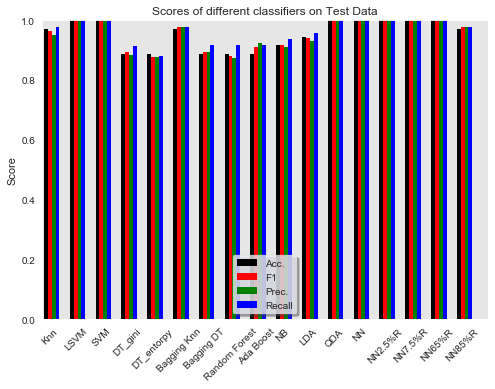

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_NN2),
           metrics.accuracy_score(y_deploy, y_pred_NN3),
           metrics.accuracy_score(y_deploy, y_pred_NN4)]
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN2, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN3, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN4, average="macro")]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN2, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN3, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN4, average="macro")]
F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN1, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN2, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN3, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN4, average="macro")]
N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.15                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' , 'NN', 'NN2.5%R' , 'NN7.5%R' , 'NN65%R' , 'NN85%R']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)



## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [22]:
import pandas as pd
from math import pi
from bokeh.charts import Bar, Area, defaults
from bokeh.layouts import row
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
#from bokeh.charts.utils import df_from_json
from bokeh.plotting import figure, output_notebook, show
############################################################################################################
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
#defaults.width = 1000
#defaults.height = 800
output_notebook()
df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

Loading BokehJS ...

## Compare All the results

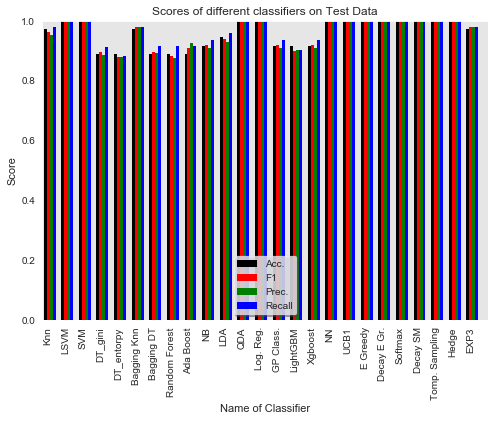

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_NN1),
           metrics.accuracy_score(y_deploy, y_pred_EG),
           metrics.accuracy_score(y_deploy, y_pred_AEG),
           metrics.accuracy_score(y_deploy, y_pred_SM),
           metrics.accuracy_score(y_deploy, y_pred_ASM),
           metrics.accuracy_score(y_deploy, y_pred_TS),
           metrics.accuracy_score(y_deploy, y_pred_HG),
           metrics.accuracy_score(y_deploy, y_pred_EXP)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="macro"),
               metrics.precision_score(y_deploy, y_pred_EG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_AEG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_SM, average="macro"),
               metrics.precision_score(y_deploy, y_pred_ASM, average="macro"),
               metrics.precision_score(y_deploy, y_pred_TS, average="macro"),
               metrics.precision_score(y_deploy, y_pred_HG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_EXP, average="macro")]
RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="macro"),
              metrics.recall_score(y_deploy, y_pred_EG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_AEG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_SM, average="macro"),
              metrics.recall_score(y_deploy, y_pred_ASM, average="macro"),
              metrics.recall_score(y_deploy, y_pred_TS, average="macro"),
              metrics.recall_score(y_deploy, y_pred_HG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_EXP, average="macro")]
F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),                             
          metrics.f1_score(y_deploy, y_pred_NN1, average="macro"),
          metrics.f1_score(y_deploy, y_pred_EG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_AEG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_SM, average="macro"),
          metrics.f1_score(y_deploy, y_pred_ASM, average="macro"),
          metrics.f1_score(y_deploy, y_pred_TS, average="macro"),
          metrics.f1_score(y_deploy, y_pred_HG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_EXP, average="macro")]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'UCB1' , 'E Greedy' , 'Decay E Gr.' , 'Softmax', 'Decay SM',
               'Tomp. Sampling', 'Hedge', 'EXP3']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [24]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

In [25]:
df1.to_csv('win.csv')

## Compare UCB1

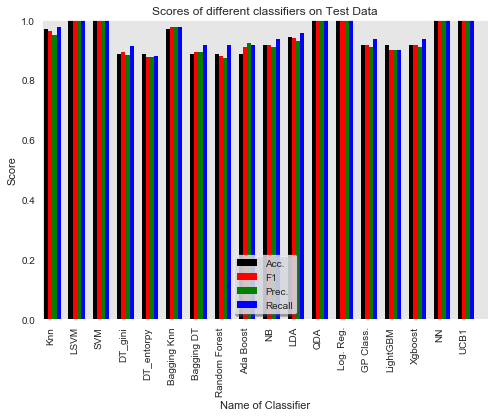

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_NN1)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN1, average="macro")]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NN1, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),                             
          metrics.f1_score(y_deploy, y_pred_NN1, average="macro")]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'UCB1']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [27]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

## Compare Epsilon greedy

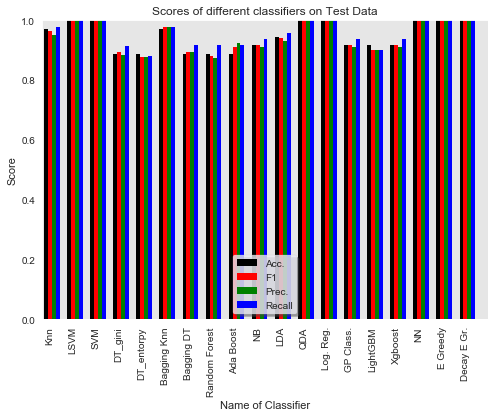

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_EG),
           metrics.accuracy_score(y_deploy, y_pred_AEG)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_EG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_AEG, average="macro")]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_EG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_AEG, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),                             
          metrics.f1_score(y_deploy, y_pred_EG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_AEG, average="macro")]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'E Greedy' , 'Decay E Gr.' ]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [29]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

## Compare Softmax

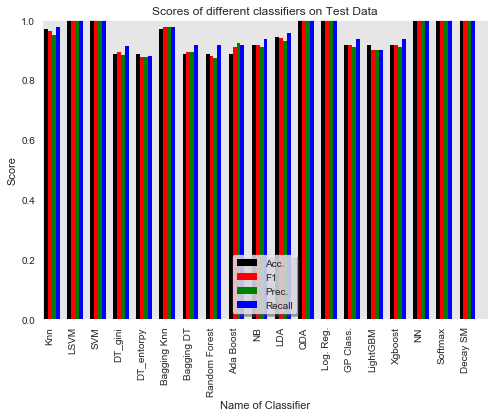

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_SM),
           metrics.accuracy_score(y_deploy, y_pred_ASM)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_SM, average="macro"),
               metrics.precision_score(y_deploy, y_pred_ASM, average="macro")]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_SM, average="macro"),
              metrics.recall_score(y_deploy, y_pred_ASM, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),  
          metrics.f1_score(y_deploy, y_pred_SM, average="macro"),
          metrics.f1_score(y_deploy, y_pred_ASM, average="macro")]              



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'Softmax', 'Decay SM']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [31]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

## Compare Esiplon greedy and Softmax

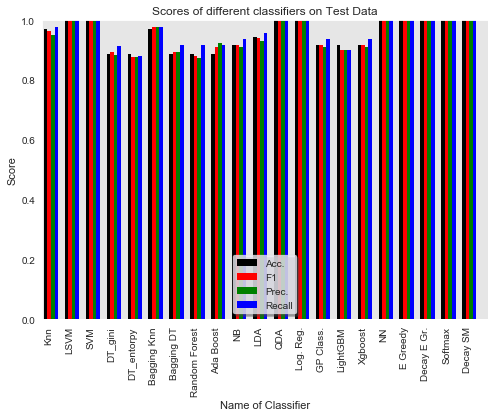

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_EG),
           metrics.accuracy_score(y_deploy, y_pred_AEG),
           metrics.accuracy_score(y_deploy, y_pred_SM),
           metrics.accuracy_score(y_deploy, y_pred_ASM)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_EG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_AEG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_SM, average="macro"),
               metrics.precision_score(y_deploy, y_pred_ASM, average="macro")]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_EG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_AEG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_SM, average="macro"),
              metrics.recall_score(y_deploy, y_pred_ASM, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),                             
          metrics.f1_score(y_deploy, y_pred_EG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_AEG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_SM, average="macro"),
          metrics.f1_score(y_deploy, y_pred_ASM, average="macro")]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN',  'E Greedy' , 'Decay E Gr.' , 'Softmax', 'Decay SM']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [33]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

## Hedge and EXP3

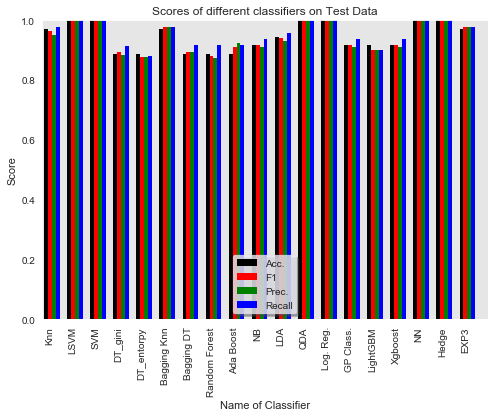

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),        
           metrics.accuracy_score(y_deploy, y_pred_HG),
           metrics.accuracy_score(y_deploy, y_pred_EXP)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_HG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_EXP, average="macro")]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_HG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_EXP, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),                             
          metrics.f1_score(y_deploy, y_pred_HG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_EXP, average="macro")]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'Hedge', 'EXP3']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)
plt.show()

In [35]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

## Thompson Sampling

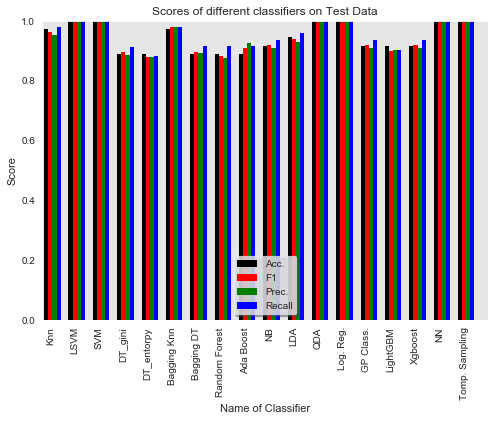

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
accData = [metrics.accuracy_score(y_deploy, y_pred_neigh),
           metrics.accuracy_score(y_deploy, y_pred_svm_linear), 
           metrics.accuracy_score(y_deploy, y_pred_svm), 
           metrics.accuracy_score(y_deploy, y_pred_gtgini),
           metrics.accuracy_score(y_deploy, y_pred_dt_IG), 
           metrics.accuracy_score(y_deploy, y_pred_dt_BGKN),
           metrics.accuracy_score(y_deploy, y_pred_dt_BGDT), 
           metrics.accuracy_score(y_deploy, y_pred_dt_RF),
           metrics.accuracy_score(y_deploy, y_pred_dt_AD), 
           metrics.accuracy_score(y_deploy, y_pred_NB),
           metrics.accuracy_score(y_deploy, y_pred_dt_LDA), 
           metrics.accuracy_score(y_deploy, y_pred_dt_QDA),           
           metrics.accuracy_score(y_deploy, y_pred_LR),
           metrics.accuracy_score(y_deploy, y_pred_GP),
           metrics.accuracy_score(y_deploy, y_pred_gbm),
           metrics.accuracy_score(y_deploy, y_pred_xgboost),
           metrics.accuracy_score(y_deploy, y_pred_NN),
           metrics.accuracy_score(y_deploy, y_pred_TS)]
          
PresionData = [metrics.precision_score(y_deploy, y_pred_neigh, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm_linear, average="macro"),
               metrics.precision_score(y_deploy, y_pred_svm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gtgini, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_IG, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGKN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_BGDT, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_RF, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_AD, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NB, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_LDA, average="macro"),
               metrics.precision_score(y_deploy, y_pred_dt_QDA, average="macro"),              
               metrics.precision_score(y_deploy, y_pred_LR, average="macro"),
               metrics.precision_score(y_deploy, y_pred_GP, average="macro"),
               metrics.precision_score(y_deploy, y_pred_gbm, average="macro"),
               metrics.precision_score(y_deploy, y_pred_xgboost, average="macro"),
               metrics.precision_score(y_deploy, y_pred_NN, average="macro"),
               metrics.precision_score(y_deploy, y_pred_TS, average="macro")]

RecallData = [ metrics.recall_score(y_deploy, y_pred_neigh, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm_linear, average="macro"),
              metrics.recall_score(y_deploy, y_pred_svm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gtgini, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_IG, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGKN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_BGDT, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_RF, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_AD, average="macro"),
              metrics.recall_score(y_deploy, y_pred_NB, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_LDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_dt_QDA, average="macro"),
              metrics.recall_score(y_deploy, y_pred_LR, average="macro"),
              metrics.recall_score(y_deploy, y_pred_GP, average="macro"),
              metrics.recall_score(y_deploy, y_pred_gbm, average="macro"),
              metrics.recall_score(y_deploy, y_pred_xgboost, average="macro"),       
              metrics.recall_score(y_deploy, y_pred_NN, average="macro"),
              metrics.recall_score(y_deploy, y_pred_TS, average="macro")]

F1Data = [metrics.f1_score(y_deploy, y_pred_neigh, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm_linear, average="macro"),
          metrics.f1_score(y_deploy, y_pred_svm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gtgini, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_IG, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGKN, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_BGDT, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_RF, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_AD, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NB, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_LDA, average="macro"),
          metrics.f1_score(y_deploy, y_pred_dt_QDA, average="macro"),         
          metrics.f1_score(y_deploy, y_pred_LR, average="macro"),
          metrics.f1_score(y_deploy, y_pred_GP, average="macro"),
          metrics.f1_score(y_deploy, y_pred_gbm, average="macro"),
          metrics.f1_score(y_deploy, y_pred_xgboost, average="macro"),
          metrics.f1_score(y_deploy, y_pred_NN, average="macro"),                             
          metrics.f1_score(y_deploy, y_pred_TS, average="macro")]         



N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.17                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='black',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = ax.bar(ind+width, F1Data, width,
                    color='red',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='black'))
rects3 = ax.bar(ind+width+width, PresionData, width,
                    color='green',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='blue'))
rects4 = ax.bar(ind+width+width+width, RecallData, width,
                    color='blue',
                    #yerr=womenStd,
                    error_kw=dict(elinewidth=2,ecolor='green'))
# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Name of Classifier')
ax.set_title('Scores of different classifiers on Test Data')
xTickMarks = ['Knn', 'LSVM', 'SVM', 'DT_gini', 'DT_entorpy' ,
              'Bagging Knn' , 'Bagging DT' , 'Random Forest' , 'Ada Boost' ,
              'NB' , 'LDA' , 'QDA' ,'Log. Reg.' ,'GP Class.','LightGBM','Xgboost',
              'NN', 'Tomp. Sampling']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10, )
## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Acc.', 'F1' , 'Prec.' , 'Recall') , loc=8, fancybox=True, 
          frameon=True, shadow=True)
ax.set_facecolor('0.9')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.spines['top'].set_linewidth(0.9)
ax.spines['right'].set_linewidth(0.9)
ax.spines['bottom'].set_linewidth(0.9)
ax.spines['left'].set_linewidth(0.9)
ax.grid(False)

plt.show()

In [37]:

df1 = pd.DataFrame({'Matric': xTickMarks,
                    'Accuracy':accData, 
                   'Precision': PresionData, 
                   'Recall': RecallData, 
                    'F1 Score': F1Data})
############################################################################################################
bar = Bar(df1,
          values=blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
          label=cat(columns='Matric', sort=False),
          stack=cat(columns='Score', sort=False),
          color=color(columns='Score', palette=['SaddleBrown', 'Silver', 'Goldenrod', 'Grey'],
                      sort=False),
          legend='bottom_center', xlabel="List of Models", ylabel="The Scores",
          title="Scores of different Models", 
          tooltips=[('Score', '@Score'), ('Model', '@Matric')],
          tools=TOOLS, plot_width=900, plot_height=800)
bar.title.align = "center"
bar.xaxis.major_label_orientation = pi/2
###############################################################################################################
p = Bar(df1, label='Matric', 
        values = blend('Accuracy', 'F1 Score', 'Precision','Recall', name='Scores', labels_name='Score'),
        group=cat(columns='Score', sort=False),
        title="Scores of different Models", legend='bottom_center',
       tools=TOOLS, plot_width=900, plot_height=600,
       xlabel='List of Models', ylabel='The Scores')
p.title.align = "center"
#p.yaxis.major_label_orientation = "vertical"
p.xaxis.major_label_orientation = pi/2
#########################################################################################################
data = dict(
    Acc = accData,
    Pre = PresionData,
    Rec = RecallData,
    F1 = F1Data,
)
area1 = Area(data, title="The trend of score over Models", legend="bottom_center",
             xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area1.title.align = "center"
area2 = Area(data, title="The trend of score over Models", legend="bottom_center",
             stack=True, xlabel='List of Models', ylabel='The Scores',
            tools=TOOLS, plot_width=450, plot_height=300)
area2.title.align = "center"
#########################################################################################################
show(bar)
show(p)
#show(area1)
#show(area2)
show(row(area1, area2))

# Compute Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (15, 6)
targetLabel = ['1','2','3']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(targetLabel))
    plt.xticks(tick_marks, targetLabel)
    plt.yticks(tick_marks, targetLabel)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Compute Confusion on Knn

Confusion matrix, without normalization
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.94  0.06]
 [ 0.    0.    1.  ]]


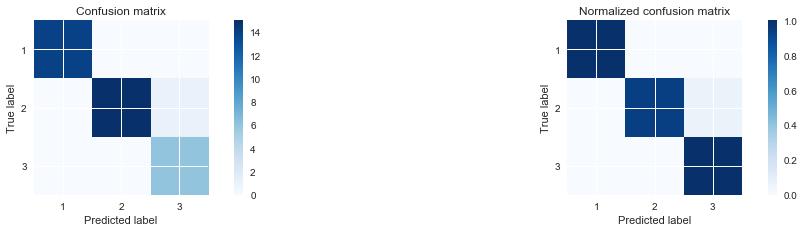

In [39]:
cm = confusion_matrix(y_deploy, y_pred_neigh)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LSVM

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


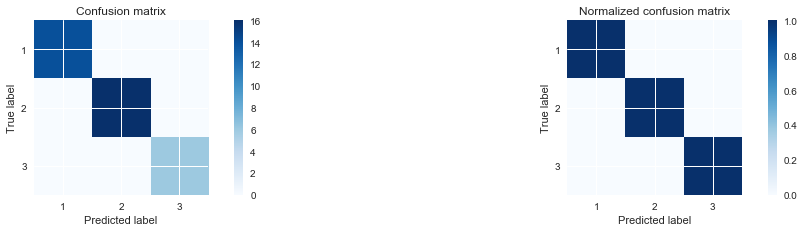

In [40]:
cm = confusion_matrix(y_deploy, y_pred_svm_linear)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on SVM

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


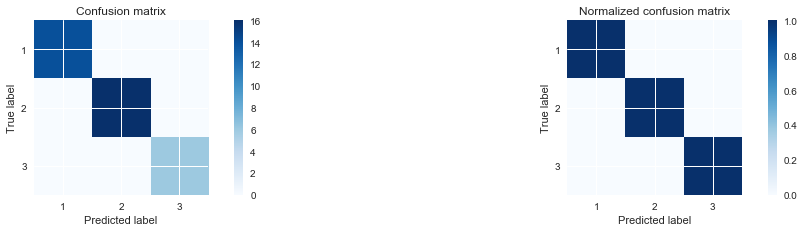

In [41]:
cm = confusion_matrix(y_deploy, y_pred_svm)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with gini "CART"

Confusion matrix, without normalization
[[13  1  0]
 [ 2 13  1]
 [ 0  0  6]]
Normalized confusion matrix
[[ 0.93  0.07  0.  ]
 [ 0.12  0.81  0.06]
 [ 0.    0.    1.  ]]


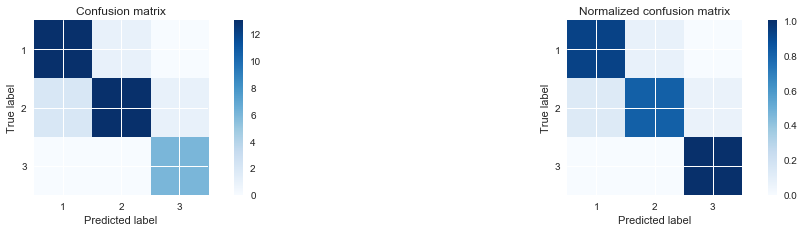

In [42]:
cm = confusion_matrix(y_deploy, y_pred_gtgini)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on DT with entory "C5.0"

Confusion matrix, without normalization
[[14  0  0]
 [ 2 13  1]
 [ 0  1  5]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.12  0.81  0.06]
 [ 0.    0.17  0.83]]


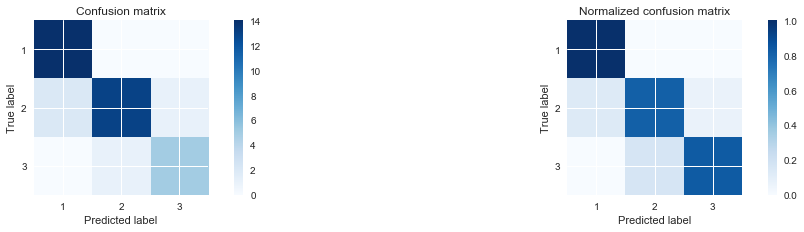

In [43]:
cm = confusion_matrix(y_deploy, y_pred_dt_IG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with Knn

Confusion matrix, without normalization
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.06  0.94  0.  ]
 [ 0.    0.    1.  ]]


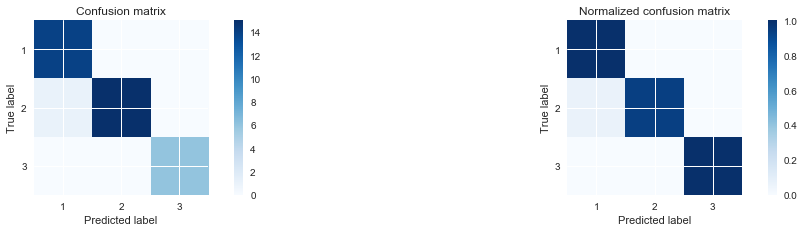

In [44]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGKN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Bagging with DT "CART"

Confusion matrix, without normalization
[[14  0  0]
 [ 3 12  1]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.19  0.75  0.06]
 [ 0.    0.    1.  ]]


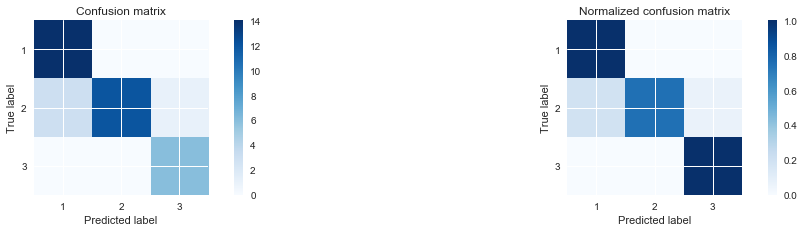

In [45]:
cm = confusion_matrix(y_deploy, y_pred_dt_BGDT)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Random Forest

Confusion matrix, without normalization
[[14  0  0]
 [ 2 12  2]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.12  0.75  0.12]
 [ 0.    0.    1.  ]]


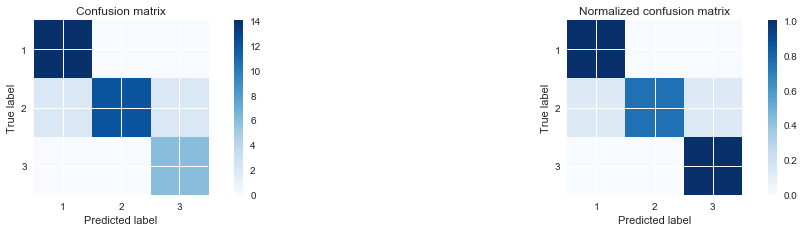

In [46]:
cm = confusion_matrix(y_deploy, y_pred_dt_RF)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Ada Boost

Confusion matrix, without normalization
[[14  0  0]
 [ 4 12  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.25  0.75  0.  ]
 [ 0.    0.    1.  ]]


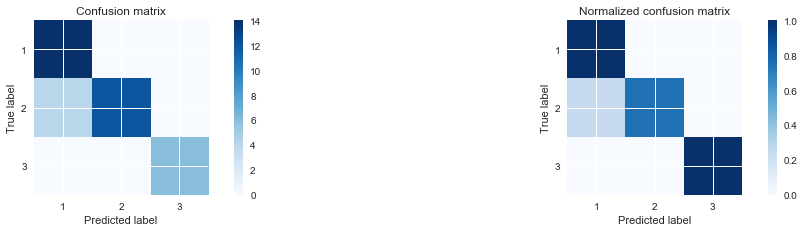

In [47]:
cm = confusion_matrix(y_deploy, y_pred_dt_AD)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Naive Bayes


Confusion matrix, without normalization
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.12  0.81  0.06]
 [ 0.    0.    1.  ]]


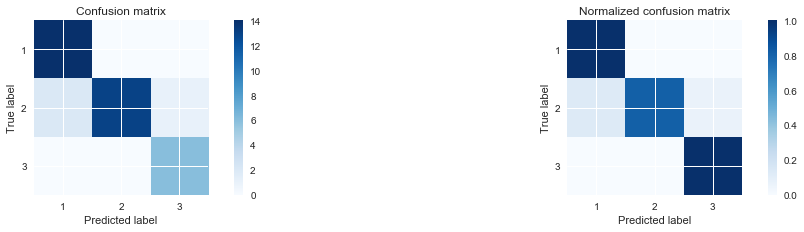

In [48]:
cm = confusion_matrix(y_deploy, y_pred_NB)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on LDA

Confusion matrix, without normalization
[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.06  0.88  0.06]
 [ 0.    0.    1.  ]]


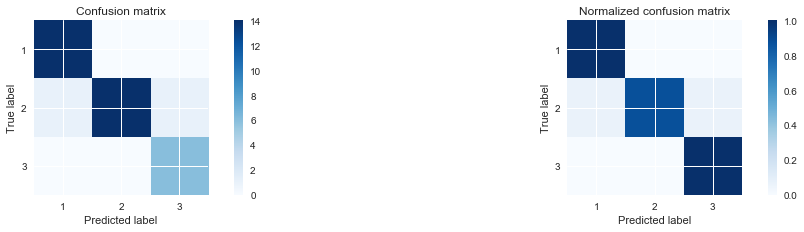

In [49]:
cm = confusion_matrix(y_deploy, y_pred_dt_LDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on QDA

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


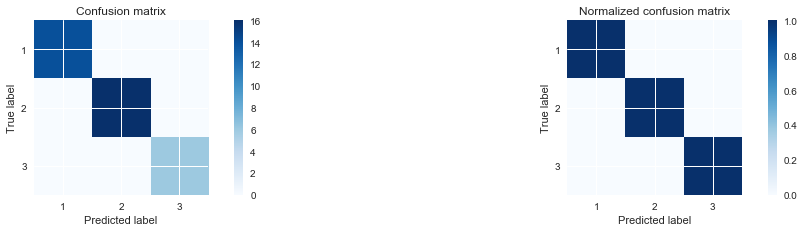

In [50]:
cm = confusion_matrix(y_deploy, y_pred_dt_QDA)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN


Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


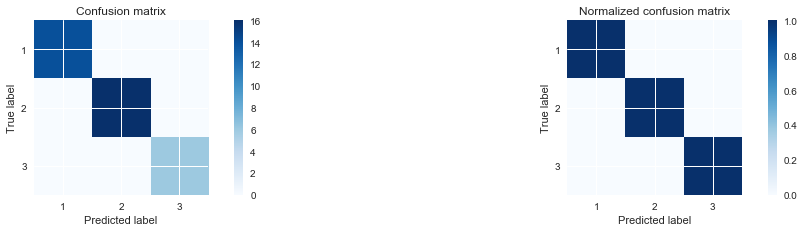

In [51]:
cm = confusion_matrix(y_deploy, y_pred_NN)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on UCB1 NN 2.5% neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


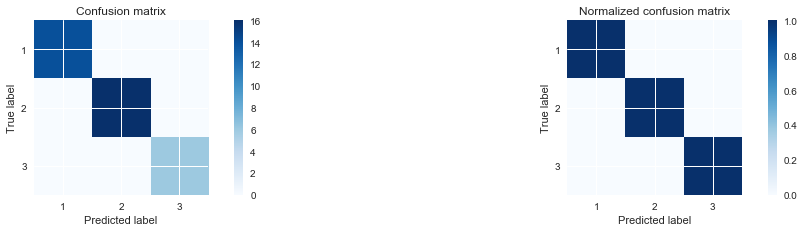

In [52]:
cm = confusion_matrix(y_deploy, y_pred_NN1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 7.5% neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


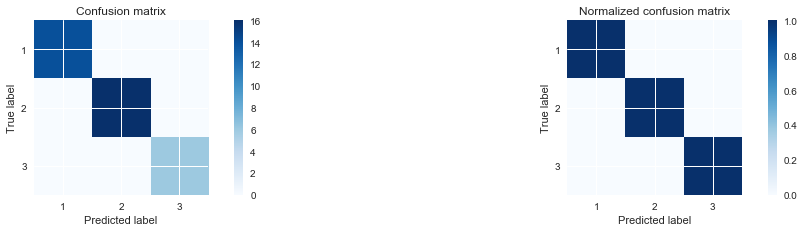

In [53]:
cm = confusion_matrix(y_deploy, y_pred_NN2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 65% neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


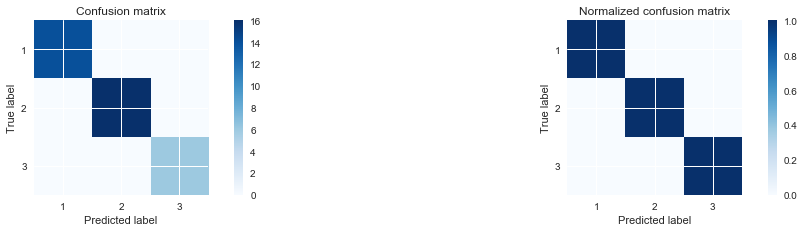

In [54]:
cm = confusion_matrix(y_deploy, y_pred_NN3)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on NN 85% neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.06  0.94  0.  ]
 [ 0.    0.    1.  ]]


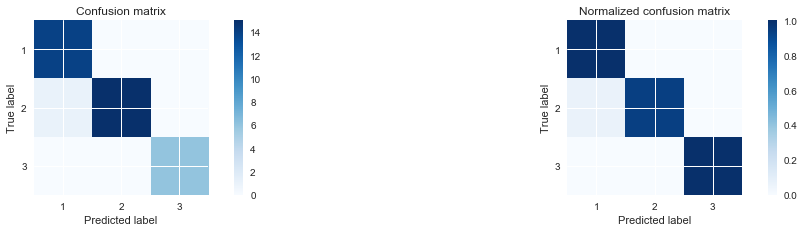

In [55]:
cm = confusion_matrix(y_deploy, y_pred_NN4)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Epsilon Greedy neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


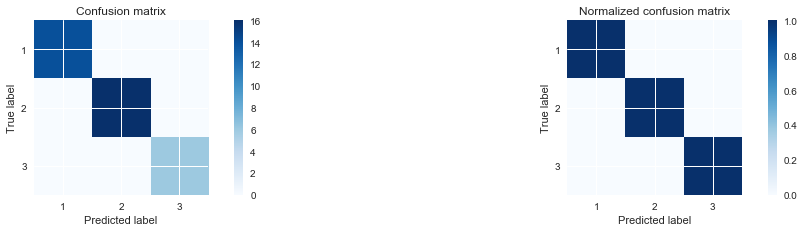

In [56]:
cm = confusion_matrix(y_deploy, y_pred_EG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## Compute Confusion on Decaying Epsilon Greedy neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


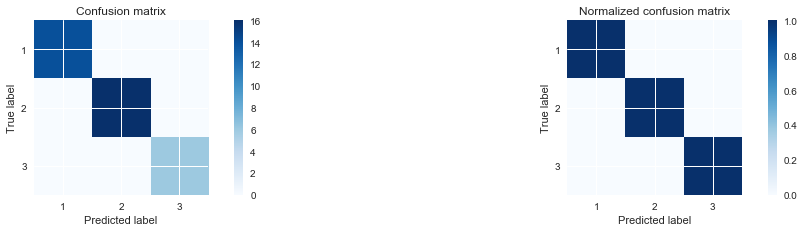

In [57]:
cm = confusion_matrix(y_deploy, y_pred_AEG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on SOFTMAX neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


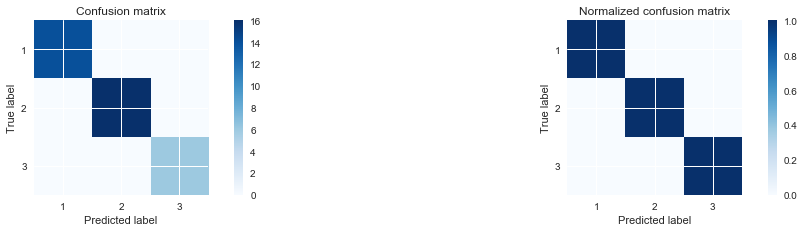

In [58]:
cm = confusion_matrix(y_deploy, y_pred_SM)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on DECAYING SOFTMAX neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


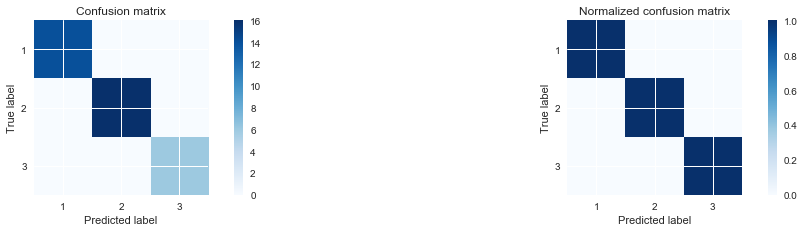

In [59]:
cm = confusion_matrix(y_deploy, y_pred_ASM)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on THOMPSON SAMPLING neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


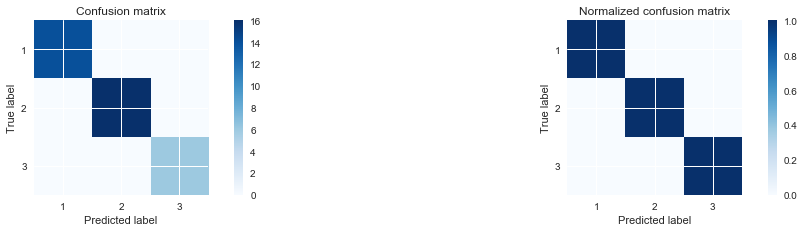

In [60]:
cm = confusion_matrix(y_deploy, y_pred_TS)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on HEDGE neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


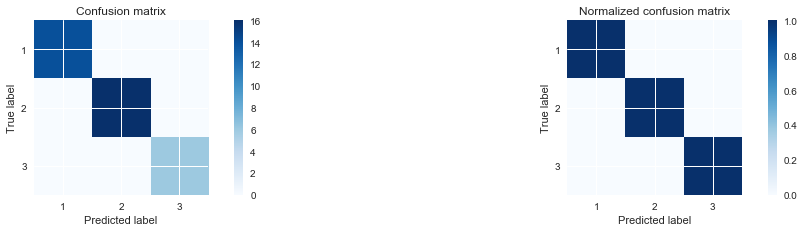

In [61]:
cm = confusion_matrix(y_deploy, y_pred_HG)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

## Compute Confusion on EXP3 neurals removed

Confusion matrix, without normalization
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.06  0.94  0.  ]
 [ 0.    0.    1.  ]]


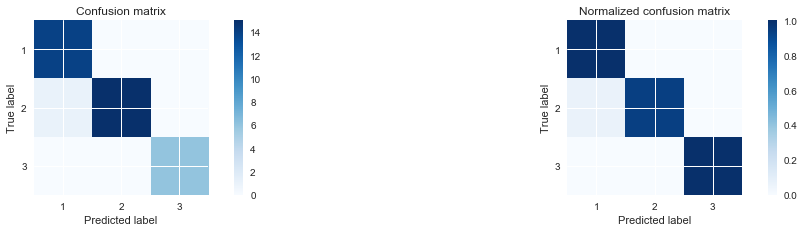

In [62]:
cm = confusion_matrix(y_deploy, y_pred_EXP)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)
plot_confusion_matrix(cm)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()